# Credit Card Fraud Detection
### Task 1
## CodeClause Data Science Internship
### Tridib Dalui

In [1]:
import numpy as np
import pandas as pd

C:\Users\tridi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104767,69221.0,-0.673086,-0.776631,1.607478,-1.282783,0.320401,2.171972,-1.022249,0.877633,-1.174705,...,0.653834,1.723640,-0.009213,-1.853575,-0.510141,0.151355,0.197756,0.118261,59.99,0
260009,159366.0,2.041064,-0.158025,-1.191743,0.232003,0.010423,-0.721906,0.030144,-0.129789,0.404188,...,-0.266096,-0.699914,0.296066,-0.354146,-0.308359,0.200496,-0.079342,-0.074748,1.98,0
165715,117610.0,0.247274,0.979515,-2.176764,-0.659558,1.369650,-0.212787,0.755309,0.345277,-0.489775,...,0.321337,0.878401,-0.174784,-0.387633,-0.192487,0.684703,-0.147309,-0.059234,30.00,0
151659,95965.0,-1.046015,1.615465,-0.534438,-0.698068,0.731825,-0.196335,0.357459,0.498628,1.258501,...,-0.470084,-1.275948,-0.001686,-0.000664,0.035270,0.156929,-0.133706,0.059855,5.49,0
74824,55774.0,1.494973,-0.383319,-0.668531,-1.046925,-0.035121,-0.416992,-0.186323,-0.165578,-1.274527,...,0.158633,0.352192,-0.312974,-0.792995,0.907474,-0.028748,-0.036032,-0.021448,10.00,0
203232,134724.0,-0.588400,1.140840,-1.079335,-1.421865,0.850012,-1.414120,1.119094,0.155671,-0.504740,...,0.200782,0.430334,-0.420048,-0.326683,0.753287,0.162585,-0.140214,-0.116292,3.84,0
73034,54946.0,-1.202762,-0.391748,1.716516,-0.859683,-2.163776,1.333240,1.379126,0.147387,1.142457,...,-0.059298,0.156577,-0.002044,0.034065,0.279940,-0.583765,0.218586,-0.041054,413.58,0
252552,155859.0,-1.724489,-0.681480,0.746969,-2.333711,-1.199226,0.280815,0.805278,0.013923,-0.488163,...,0.282193,1.196867,-0.197326,-0.424100,0.281430,-0.091885,0.651407,0.474663,320.00,0
104739,69209.0,-2.431366,2.360288,0.786640,0.164614,0.368304,-0.333723,1.375833,-0.924431,2.049566,...,-0.257990,0.466121,-0.142232,0.032536,-0.033711,-0.425721,-0.104902,-0.063847,7.99,0
173784,121639.0,1.986691,-1.209920,-0.523049,-0.698713,-1.251198,-0.743565,-0.845271,-0.186899,0.049258,...,0.387056,1.043243,0.060232,0.042969,-0.180406,-0.095651,0.000632,-0.032218,99.00,0


In [4]:
# Shape of the data

df.shape

(284807, 31)

In [5]:
#cheking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check the name of the columns

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Data Preprocessing 

In [7]:
#cheking for null values

df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

there is no null data so we don't have to remove any 

In [8]:
#cheking for duplicate data

if(df.duplicated().sum() == 0):
    print("NO DUPLICATE COLUMNS")
else:
    print("There are ",df.duplicated().sum(), "Duplicate columns")

There are  1081 Duplicate columns


#### Statistical Description 

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# Checking the class section

df['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [11]:
#checking the Amount section

df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
#checking for fraud description
df[df['Class']==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#checking for non fraud description
df[df['Class']==0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Data Visulaization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [15]:
fraud_cases=len(df[df['Class']==1])
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [16]:
non_fraud_cases=len(df[df['Class']==0])
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


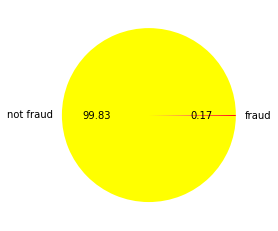

In [17]:
#pie chart for fraud and non fraud data

plt.pie(df['Class'].value_counts(),labels=['not fraud','fraud'],colors=['yellow','red'],autopct='%0.2f')
plt.show()

The data is unbalanced

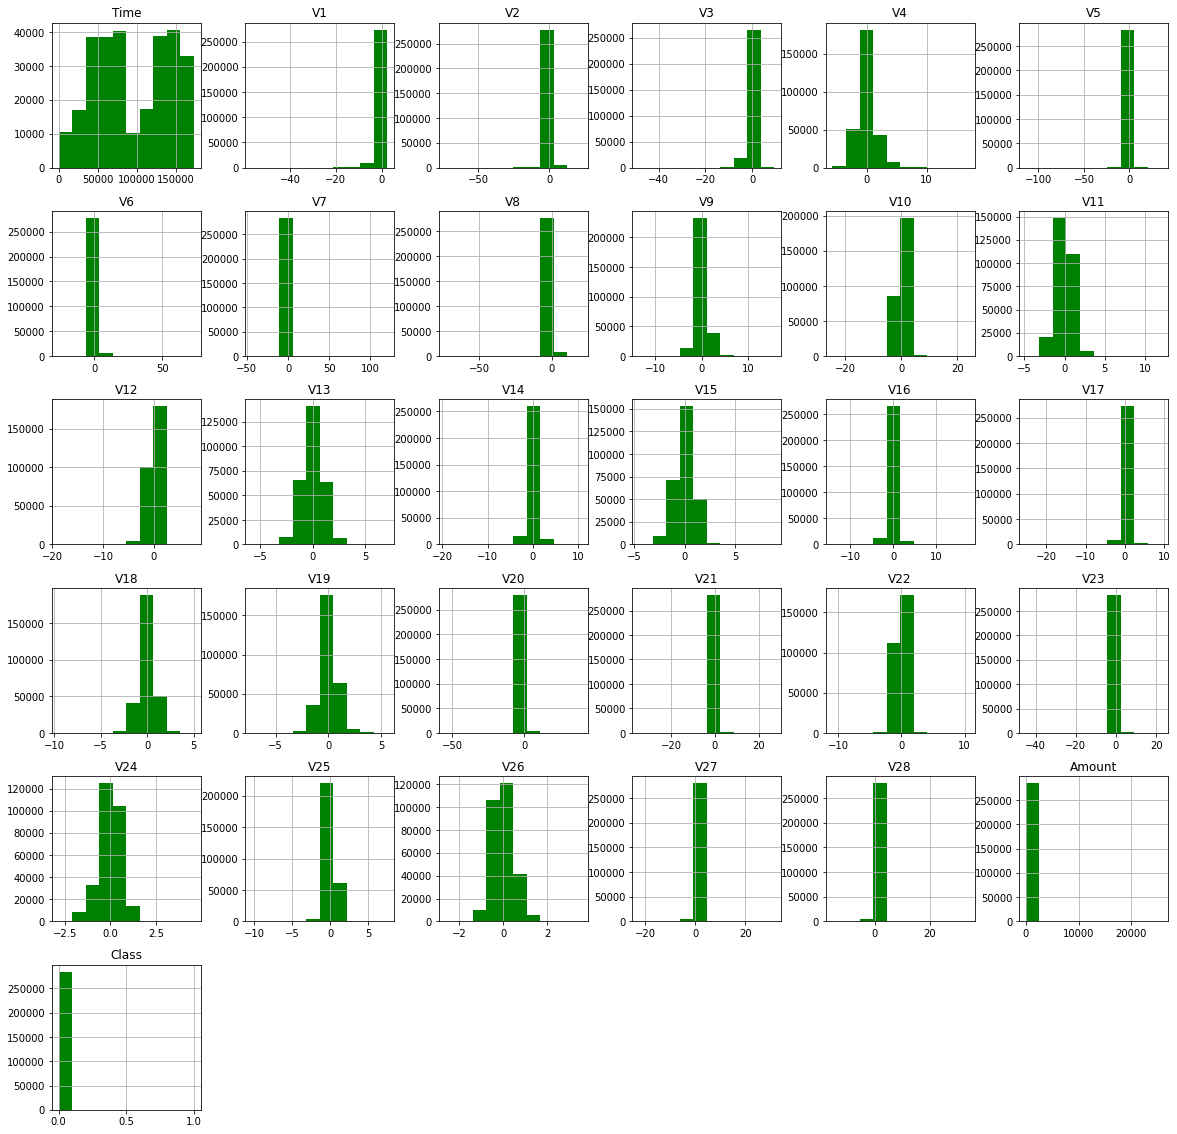

In [18]:
# histogram of all columns

df.hist(figsize=(20,20),color='green')
plt.show()

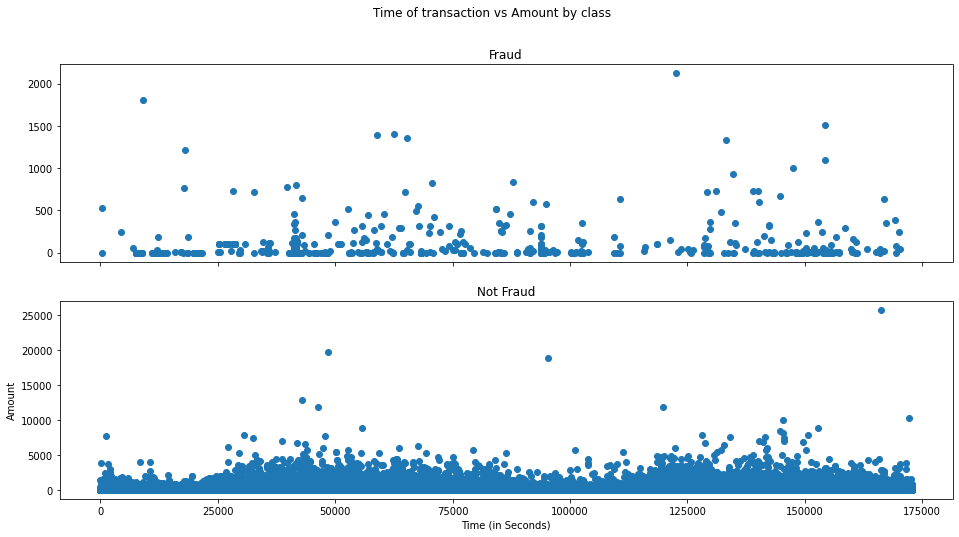

In [19]:
# scatterplot of ammount vs time

rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(df[df['Class']==1].Time, df[df['Class']==1].Amount)
ax1.set_title('Fraud')
ax2.scatter(df[df['Class']==0].Time,df[df['Class']==0].Amount)
ax2.set_title('Not Fraud')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<AxesSubplot: >

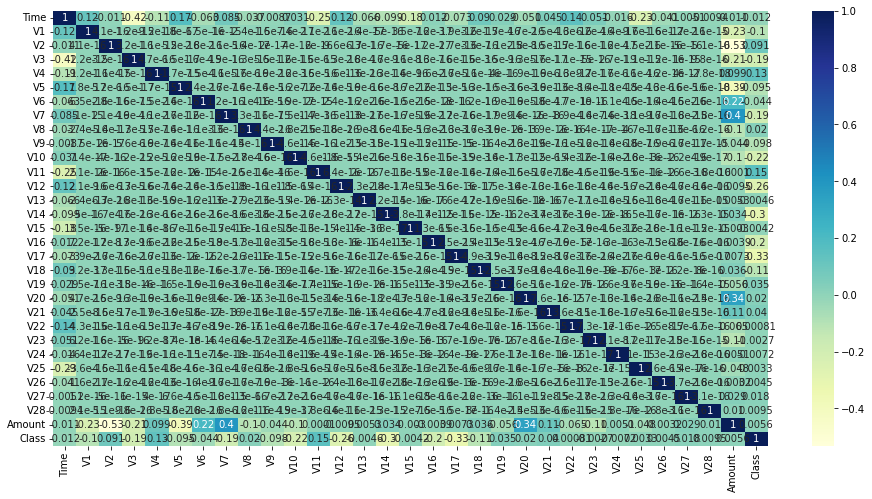

In [20]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### separating the Traning and testing data

In [21]:
x=df.drop(['Class'],axis=1)
y=df['Class']

#### Separating the training and testing data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## We Will apply 2 Models Here
### 1)Logistic Regression
### 2)Decision tree regression

In [24]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [25]:
# 1) Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model2=lr.fit(x_train,y_train)
prediction2=model2.predict(x_test)
accuracy_score(y_test,prediction2)

0.9990519995786665

In [26]:
# 2) decision tree regression

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model3=dt.fit(x_train,y_train)
prediction3=model3.predict(x_test)
accuracy_score(y_test,prediction3)

0.9989291106351603

#### As Decision treee model is giving us more accuracy then let's use that

#### Now Test Our Model 

In [27]:
pred=dt.predict([['4.06000000e+02', '-2.31222654e+00',  '1.95199201e+00', '-1.60985073e+00',
        '3.99790559e+00', '-5.22187865e-01', '-1.42654532e+00', '-2.53738731e+00',
        '1.39165725e+00', '-2.77008928e+00', '-2.77227214e+00',  '3.20203321e+00',
       '-2.89990739e+00', '-5.95221881e-01', '-4.28925378e+00',  '3.89724120e-01',
       '-1.14074718e+00', '-2.83005567e+00', '-1.68224682e-02',  '4.16955705e-01',
        '1.26910559e-01',  '5.17232371e-01', '-3.50493686e-02', '-4.65211076e-01',
        '3.20198199e-01',  '4.45191675e-02',  '1.77839798e-01',  '2.61145003e-01',
       '-1.43275875e-01',  '0.00000000e+00']])
if(pred[0]==0):
    print("Not Fraud")
else:
    print("Fraud Credit Card") #original ans = Fraud

Fraud Credit Card


In [28]:
pred=dt.predict([[ '4.06000000e+02', '-8.14053959e-01',  '1.53822156e+00',  '1.11568996e+00',
       '-5.16668054e-02',  '9.23341570e-02', '-1.01339788e+00',  '7.48850874e-01',
       '-1.24813888e-01', '-2.07406950e-01',  '7.28417294e-02',  '5.82845272e-02',
        '6.39903035e-01',  '1.42894200e+00', '-8.30482497e-01',  '7.82317854e-01',
        '2.78964106e-01', '-8.36263151e-02', '-3.33308043e-01', '-1.58428708e-01',
        '4.45198938e-01', '-3.11451579e-01', '-6.27543769e-01', '-1.64685816e-02',
        '3.63402524e-01', '-1.46310819e-02',  '7.69141479e-02',  '4.67478413e-01',
        '2.28122870e-01',  '1.98000000e+00']])
if(pred[0]==0):
    print("Not Fraud")
else:
    print("Fraud Credit Card") # original ans Not Fraud

Not Fraud


### Saving the model

In [29]:
import pickle
pickle.dump(dt,open('credit_card_fraud_detetor.pkl','wb'))

# Thank You